# Worksheet 06

Name: Stone Harris
UID: U41533031

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

K-means++ chooses the starting centroids more carefully to improve clustering, while K-means picks them randomly which can sometimes lead to not so good groupings.

b) What are some limitations of K means ++?

K-means++ can still get stuck in local optima, and it's not ideal for finding clusters of varying sizes and densities.

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

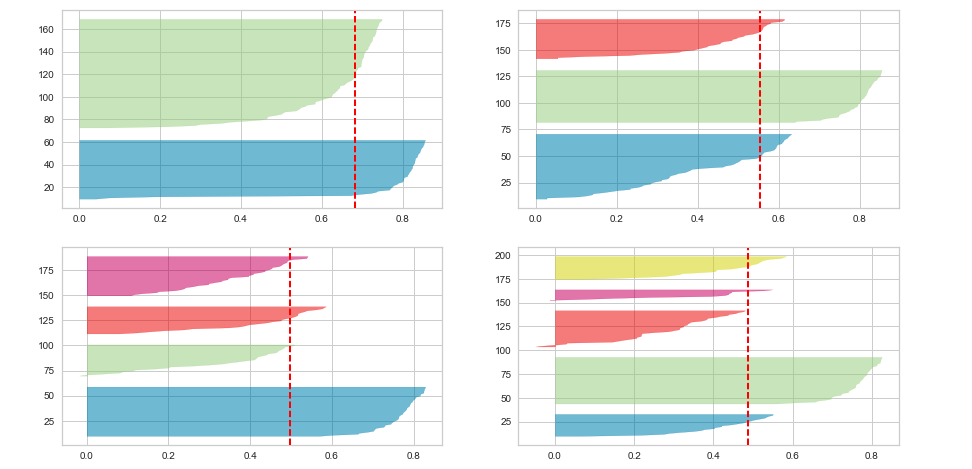

In [ ]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

Based on the silhouette scores, I think K=2 might be the best as it has the highest average silhouette score. This shows strong cluster cohesion and separation. The rest of the K values show that far less points are clustered well.

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 | √2  | 3  | √1  | √8  |
| B | √2  | 0 | √5  | √1  | √2  |
| C | 3  | √5  | 0 | √10  | √5  |
| D | √1  | √1  | √10  | 0 | √5  |
| E | √8  |  √2 |  √5 | √5  | 0 |

Step 2

|   | A  | C  | D  | BE  |
|---|---|---|---|---|
| A  | 0 | 3  | √1  | √2  |
| C  | 3  | 0 | √10  | √5  |
| D  | √1  | √10  | 0 | √1  |
| BE  | √2  | √5  | √1 | 0 |

Step 3

|   | C  | AD  | BE  |
|---|---|---|---|
| C  | 0 | 3  | √5  |
| AD  | 3  | 0 | √2  |
| BE  | √5  | √2  | 0 |

Step 4

|   | C  | ABDE  |
|---|---|---|
| C  | 0 | √5  |
|  ABDE | √5  | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 | √2  | 3  | √1  | √8  |
| B | √2  | 0 | √5  | √1  | √2  |
| C | 3  | √5  | 0 | √10  | √5  |
| D | √1  | √1  | √10  | 0 | √5  |
| E | √8  |  √2 |  √5 | √5  | 0 |

Step 2

|   | AD  | B  | C  | E  |
|---|---|---|---|---|
| AD | 0 | √2  | √10  | √8  |
|  B | √2  | 0 | √5  | √2  |
| C  | √10  | √5  | 0 | √5  |
| E  | √8  | √2  | √5  | 0 |

Step 3

|   | AD  | C  | BE  |
|---|---|---|---|
| AD  | 0 | √10  | √8  |
| C  | √10  | 0 | √5  |
| BE  | √8  | √5  | 0 |

Step 4

|   | AD  | CBE  |
|---|---|---|
| AD  | 0 | √10  |
|  CBE | √10  | 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

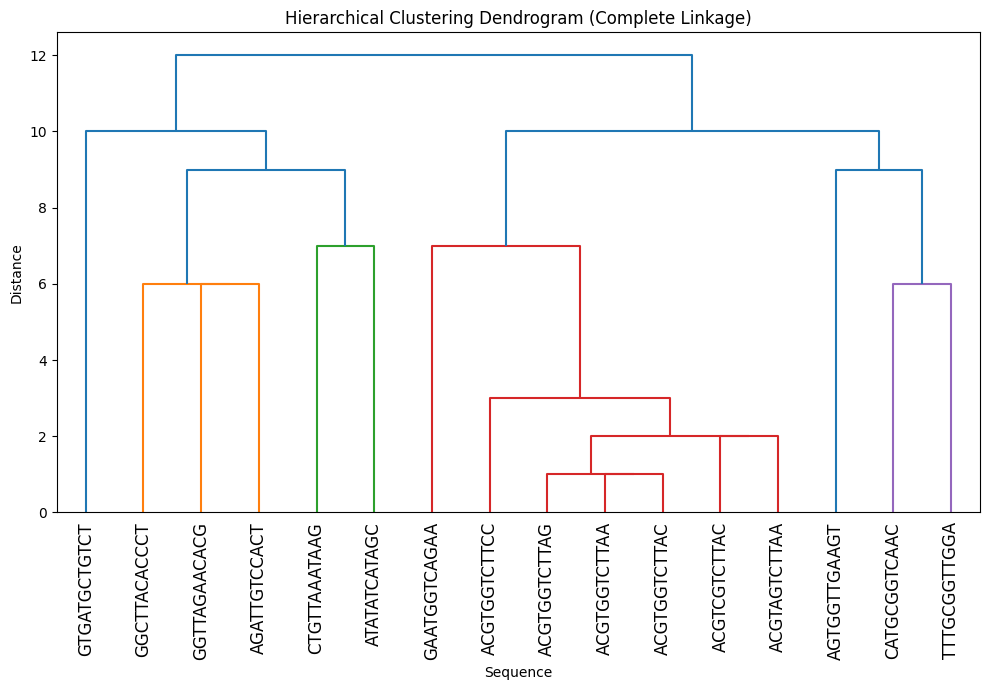

In [13]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

# function to compute Hamming
def hamming_distance(s1, s2):
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

# core function to compute the full distance matrix
def hamming_distance_matrix(sequences):
    n = len(sequences)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distance_matrix[i, j] = hamming_distance(sequences[i], sequences[j])
            distance_matrix[j, i] = distance_matrix[i, j]
    return distance_matrix

# compute distance matrix
dist_matrix = hamming_distance_matrix(sequences)

# Do the actual clustering
linked = linkage(squareform(dist_matrix), method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=sequences, orientation='top')
# had to otate x axis labels for visibility
plt.xticks(rotation=90)  
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sequence')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()
